=== Evaluasi Model IndoBERT ===
Akurasi            : 0.581
F1 Score (Macro)   : 0.395
F1 Score (Weighted): 0.559

Confusion Matrix:
 [[ 2  3  9]
 [ 0  3  8]
 [ 6  5 38]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.27      0.27      0.27        11
           2       0.69      0.78      0.73        49

    accuracy                           0.58        74
   macro avg       0.40      0.40      0.40        74
weighted avg       0.55      0.58      0.56        74



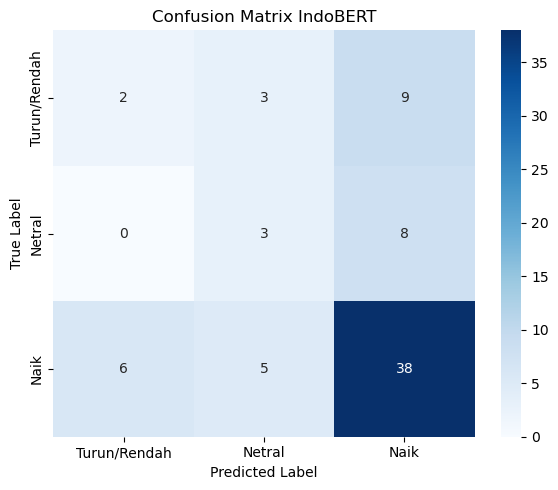

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Baca file Excel yang memuat hasil prediksi dan true_label
file_path = 'input/prediksi_sentimen_ekspektasi_inflasi_2022_02V3_F1.xlsx'  # Ganti dengan path file Anda
df = pd.read_excel(file_path)

# 2. Bersihkan data: hapus baris dengan true_label kosong
df_clean = df.dropna(subset=['true_label'])

# 3. Konversi label ke bentuk integer
y_true = df_clean['true_label'].astype(int)
y_pred = df_clean['predicted_label'].astype(int)

# 4. Hitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred)

# 5. Cetak hasil evaluasi
print("=== Evaluasi Model IndoBERT ===")
print(f"Akurasi            : {accuracy:.3f}")
print(f"F1 Score (Macro)   : {f1_macro:.3f}")
print(f"F1 Score (Weighted): {f1_weighted:.3f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

# 6. Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Turun/Rendah', 'Netral', 'Naik'],
            yticklabels=['Turun/Rendah', 'Netral', 'Naik'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix IndoBERT')
plt.tight_layout()
plt.show()